<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 10.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf
import tensorflow.keras as keras

### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [2]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes(as_frame = True)

df = diabetes.data
target = diabetes.target

### Prepare input data

In [3]:
X = df.to_numpy()
y = target

### Split the data (training/test)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Create the model's architecture

In [17]:
X_train.shape

(296, 10)

In [5]:
#Create normalization layer

from keras.layers.experimental import preprocessing

normalizer = preprocessing.Normalization()
normalizer.adapt(X_train)

In [6]:
# Mean and variances of the features are stored for normalization:

print('Means:', normalizer.mean.numpy())
print('\n')
print('Variances:', normalizer.variance.numpy())

Means: [0.00119828 0.00012094 0.0017684  0.00116473 0.00092728 0.0003529
 0.00037457 0.00017906 0.00096739 0.00184697]


Variances: [0.00212856 0.00226316 0.00226091 0.00231074 0.00227382 0.00225533
 0.00226129 0.00227309 0.00227525 0.0021854 ]


In [7]:
'''
Note:
Had tried to create model with 2 layers, but it predicted the same
value for all test rows. Not sure why. Too many layers results in bad predictions?

'''

'\nNote:\nHad tried to create model with 2 layers, but it predicted the same\nvalue for all test rows. Not sure why. Too many layers results in bad predictions?\n\n'

In [8]:
# Try to create model with 1 hidden layer?

from keras import layers

model = keras.Sequential(
    [normalizer,
     layers.Dense(units = 3, activation = 'relu', name = 'layer1'),
     layers.Dense(units = 1, activation = 'linear', name = 'layer3')
    ]
)


### Compile the model

In [9]:
model.compile(optimizer = keras.optimizers.SGD(learning_rate = 0.005),
              loss = 'MeanAbsoluteError',
              metrics = ['MeanSquaredError','RootMeanSquaredError'] )

### Fit the training data

In [10]:
modelhistory = model.fit(x = X_train,
          y = y_train,
          batch_size = 10,
          epochs = 200,
          verbose = 1
         )

Epoch 1/200
30/30 [==============================] - 0s 3ms/step - loss: 152.0379 - mean_squared_error: 29153.4902 - root_mean_squared_error: 170.7439
Epoch 2/200
30/30 [==============================] - 0s 532us/step - loss: 151.6733 - mean_squared_error: 29027.3418 - root_mean_squared_error: 170.3741
Epoch 3/200
30/30 [==============================] - 0s 532us/step - loss: 151.3138 - mean_squared_error: 28901.5684 - root_mean_squared_error: 170.0046
Epoch 4/200
30/30 [==============================] - 0s 565us/step - loss: 150.9503 - mean_squared_error: 28774.5840 - root_mean_squared_error: 169.6307
Epoch 5/200
30/30 [==============================] - 0s 532us/step - loss: 150.5644 - mean_squared_error: 28642.1309 - root_mean_squared_error: 169.2399
Epoch 6/200
30/30 [==============================] - 0s 511us/step - loss: 150.1331 - mean_squared_error: 28491.6387 - root_mean_squared_error: 168.7947
Epoch 7/200
30/30 [==============================] - 0s 532us/step - loss: 149.6387 

30/30 [==============================] - 0s 499us/step - loss: 43.7895 - mean_squared_error: 3009.1594 - root_mean_squared_error: 54.8558
Epoch 55/200
30/30 [==============================] - 0s 499us/step - loss: 43.7561 - mean_squared_error: 3015.3518 - root_mean_squared_error: 54.9122
Epoch 56/200
30/30 [==============================] - 0s 432us/step - loss: 43.8865 - mean_squared_error: 3031.3567 - root_mean_squared_error: 55.0578
Epoch 57/200
30/30 [==============================] - 0s 565us/step - loss: 43.7302 - mean_squared_error: 2991.9438 - root_mean_squared_error: 54.6987
Epoch 58/200
30/30 [==============================] - 0s 499us/step - loss: 43.8365 - mean_squared_error: 3018.1736 - root_mean_squared_error: 54.9379
Epoch 59/200
30/30 [==============================] - 0s 465us/step - loss: 43.7053 - mean_squared_error: 2996.1313 - root_mean_squared_error: 54.7369
Epoch 60/200
30/30 [==============================] - 0s 465us/step - loss: 43.6253 - mean_squared_error: 2

30/30 [==============================] - 0s 632us/step - loss: 42.9637 - mean_squared_error: 2911.9626 - root_mean_squared_error: 53.9626
Epoch 109/200
30/30 [==============================] - 0s 731us/step - loss: 43.0042 - mean_squared_error: 2889.1033 - root_mean_squared_error: 53.7504
Epoch 110/200
30/30 [==============================] - 0s 598us/step - loss: 42.9243 - mean_squared_error: 2915.1504 - root_mean_squared_error: 53.9921
Epoch 111/200
30/30 [==============================] - 0s 499us/step - loss: 42.9305 - mean_squared_error: 2910.1816 - root_mean_squared_error: 53.9461
Epoch 112/200
30/30 [==============================] - 0s 432us/step - loss: 42.9011 - mean_squared_error: 2903.4304 - root_mean_squared_error: 53.8835
Epoch 113/200
30/30 [==============================] - 0s 499us/step - loss: 43.0187 - mean_squared_error: 2901.7681 - root_mean_squared_error: 53.8681
Epoch 114/200
30/30 [==============================] - 0s 499us/step - loss: 42.8994 - mean_squared_er

Epoch 162/200
30/30 [==============================] - 0s 465us/step - loss: 42.6701 - mean_squared_error: 2881.0293 - root_mean_squared_error: 53.6752
Epoch 163/200
30/30 [==============================] - 0s 499us/step - loss: 42.7760 - mean_squared_error: 2880.1838 - root_mean_squared_error: 53.6673
Epoch 164/200
30/30 [==============================] - 0s 432us/step - loss: 42.6788 - mean_squared_error: 2873.8286 - root_mean_squared_error: 53.6081
Epoch 165/200
30/30 [==============================] - 0s 499us/step - loss: 42.6434 - mean_squared_error: 2876.7693 - root_mean_squared_error: 53.6355
Epoch 166/200
30/30 [==============================] - 0s 499us/step - loss: 42.7196 - mean_squared_error: 2872.1375 - root_mean_squared_error: 53.5923
Epoch 167/200
30/30 [==============================] - 0s 532us/step - loss: 42.7452 - mean_squared_error: 2867.7700 - root_mean_squared_error: 53.5516
Epoch 168/200
30/30 [==============================] - 0s 466us/step - loss: 42.6646 - m

### Create predictions

In [11]:
model.predict(X_test)

array([[135.09654 ],
       [205.45778 ],
       [126.00148 ],
       [315.936   ],
       [101.84871 ],
       [ 81.135605],
       [271.22354 ],
       [171.57332 ],
       [ 76.89366 ],
       [ 80.06178 ],
       [100.53682 ],
       [164.54938 ],
       [ 96.291504],
       [206.74757 ],
       [ 76.95006 ],
       [102.701965],
       [218.76588 ],
       [272.02057 ],
       [195.6875  ],
       [233.09947 ],
       [178.89082 ],
       [ 91.979965],
       [ 78.83482 ],
       [203.97618 ],
       [145.09482 ],
       [170.7487  ],
       [209.41634 ],
       [189.24422 ],
       [ 81.88013 ],
       [ 90.37598 ],
       [176.10982 ],
       [ 98.97716 ],
       [103.347595],
       [179.16275 ],
       [179.14906 ],
       [181.62032 ],
       [ 91.915955],
       [ 89.384445],
       [134.87045 ],
       [ 80.38335 ],
       [ 75.047   ],
       [ 96.105606],
       [172.43243 ],
       [146.801   ],
       [158.04778 ],
       [ 80.03516 ],
       [ 95.3544  ],
       [108.4

### Evaluate the model

In [12]:
model.evaluate(x = X_test,
               y = y_test)

5/5 [==============================] - 0s 598us/step - loss: 43.1015 - mean_squared_error: 2981.7390 - root_mean_squared_error: 54.6053


[43.101470947265625, 2981.739013671875, 54.60530090332031]

### Visualisation of cost

In [13]:
modelhistory.history.keys()

dict_keys(['loss', 'mean_squared_error', 'root_mean_squared_error'])

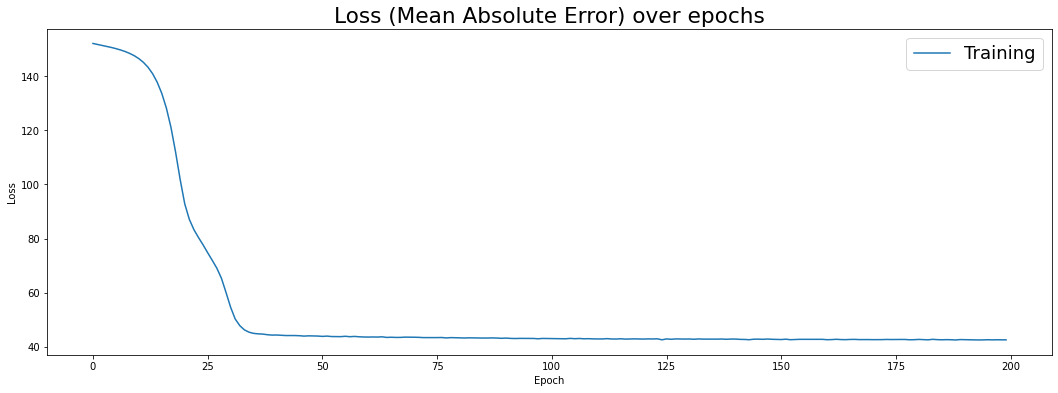

In [14]:
fig, ax = plt.subplots(1, 1, figsize = (18, 6))

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax.plot(modelhistory.history['loss'], label = 'Training')
ax.set_title('Loss (Mean Absolute Error) over epochs')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend()


### Visualisation of residuals

In [15]:
#Residuals are already visualized since the Mean Absolute Error is the loss function

© 2020 Institute of Data